# Pandas and Matplotlib (Part2)

In [2]:
# Required packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# # from matplotlib import pyplot as plt # also possible

# only in jupyter notebooks: Embed plots inside Jupyter notebooks
%matplotlib inline

f'{pd.__version__=}, {np.__version__=}'

"pd.__version__='2.0.0', np.__version__='1.24.2'"

## 4 Statistics on Series
* Series have a number of methods for performing basic statistics
* in this lecture:
    * `[.size, .count(), .sum()]`
    * `[.mean(), .median(), .std()]`
    * `[.max(), .min(), .quantile(), .describe()]`
    * `[.head(), .tail(), .sample()]`
    * `[.value_counts(), .unique(), .duplicated()]`

### 4.1 `.size`, `.count()`, and `.sum()`
* `.size` is an attribute of the series
* `.count()` and `.sum()` depend on the *contents*

In [2]:
integers = pd.Series(np.random.randint(0, 101, 5))
integers

0    27
1    55
2    13
3     2
4    64
dtype: int64

In [3]:
integers.size

5

In [4]:
integers.count()

5

In [5]:
integers.loc[0] = np.NaN
integers

0     NaN
1    55.0
2    13.0
3     2.0
4    64.0
dtype: float64

In [6]:
integers.count(), integers.size

(4, 5)

In [7]:
integers.loc[0] = np.random.randint(0, 101, 1)
integers.sum()

171.0

In [8]:
sum(integers)

171.0

In [9]:
help(pd.Series.sum)

Help on function sum in module pandas.core.generic:

sum(self, axis: 'Axis | None' = None, skipna: 'bool_t' = True, numeric_only: 'bool_t' = False, min_count: 'int' = 0, **kwargs)
    Return the sum of the values over the requested axis.
    
    This is equivalent to the method ``numpy.sum``.
    
    Parameters
    ----------
    axis : {index (0)}
        Axis for the function to be applied on.
        For `Series` this parameter is unused and defaults to 0.
    
        For DataFrames, specifying ``axis=None`` will apply the aggregation
        across both axes.
    
        .. versionadded:: 2.0.0
    
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    numeric_only : bool, default False
        Include only float, int, boolean columns. Not implemented for Series.
    
    min_count : int, default 0
        The required number of valid values to perform the operation. If fewer than
        ``min_count`` non-NA values are present the result

### 4.2 `.mean()`, `.median()`, `.std()`
* Series provide methods for simple statistics
    * arithmetic `mean` $\mu$ (average value of numeric Series)
    * `median` value (half of the values are above, half are below)
    * standard deviation $\sigma$ (measure of the "spread")
        * with *degrees of freedom* $\Delta_\text{dof}$: default 1, **differing from [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)** (where `ddof=0` by default)
        * pass `ddof=0` for the "uncorrected" standard deviation
    $$\mu = \frac{1}{N} \sum_{i=1}^N s_i~~~~~~~~;~~~~~~~~\sigma = \sqrt{\frac{1}{N-\Delta_{\text{dof}}} \sum_{i=1}^N (s_i - \mu)^2}$$

In [10]:
int_range = pd.Series(np.arange(0, 101, 1))
int_range

0        0
1        1
2        2
3        3
4        4
      ... 
96      96
97      97
98      98
99      99
100    100
Length: 101, dtype: int64

In [11]:
f'{int_range.mean()=}, {int_range.median()=}, {int_range.std()=}'

'int_range.mean()=50.0, int_range.median()=50.0, int_range.std()=29.300170647967224'

In [12]:
# The mean is the sum divided by the size
f'mean = {int_range.sum() / int_range.count()};   {int_range.mean() = }'

'mean = 50.0;   int_range.mean() = 50.0'

In [13]:
# The median is the "halfway point" of the sorted values
int_range.loc[100] = 1000000
int_range.mean(), int_range.median()

(9950.0, 50.0)

In [14]:
# The Standard Deviation is tricky!
# By default, Pandas uses the "sample standard deviation"
pd.Series((0)).std(), pd.Series((0, 0)).std(), pd.Series((0, 2)).std()

(nan, 0.0, 1.4142135623730951)

In [15]:
# If we want the uncorrected ("numpy") standard deviation, we have to pass ddof=0
pd.Series((0)).std(ddof=0), pd.Series((0, 0)).std(ddof=0), pd.Series((0, 2)).std(ddof=0)

(0.0, 0.0, 1.0)

In [16]:
help(pd.Series.std)

Help on function std in module pandas.core.generic:

std(self, axis: 'Axis | None' = None, skipna: 'bool_t' = True, ddof: 'int' = 1, numeric_only: 'bool_t' = False, **kwargs)
    Return sample standard deviation over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument.
    
    Parameters
    ----------
    axis : {index (0)}
        For `Series` this parameter is unused and defaults to 0.
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
    numeric_only : bool, default False
        Include only float, int, boolean columns. Not implemented for Series.
    
    Returns
    -------
    scalar or Series (if level specified) 
    
    Notes
    -----
    To have the same behaviour as `numpy.std`, use `ddof=0` (in

### 4.3 `.max()`, `.min()`, `.quantile()`, `.describe()`
* `.max()`, `.min()` retrieve the maximum and minimum numeric elements
* `.quantile(q=0.5: float)` returns the value at a given quantile (in $[0, 1]$)
    * a proportion of $q$ (and $1-q$, respectively) of series values is below (above) the result
    * minimum, maximum values at q = 0, 1
* `.describe()` gives summarizing statistics
    * count and type of values
    * mean and std
    * min, max
    * median and 1st, 3rd quartiles


In [17]:
int_range

0            0
1            1
2            2
3            3
4            4
        ...   
96          96
97          97
98          98
99          99
100    1000000
Length: 101, dtype: int64

In [18]:
int_range.min(), int_range.max()

(0, 1000000)

In [19]:
int_range.describe()

count        101.000000
mean        9950.000000
std        99498.797774
min            0.000000
25%           25.000000
50%           50.000000
75%           75.000000
max      1000000.000000
dtype: float64

In [20]:
points = pd.Series((0, 10, 20, 30, 40, 50))
points.quantile(0.6)

30.0

In [21]:
points.quantile(0.5)

25.0

In [22]:
help(pd.Series.quantile)

Help on function quantile in module pandas.core.series:

quantile(self, q: 'float | Sequence[float] | AnyArrayLike' = 0.5, interpolation: 'QuantileInterpolation' = 'linear') -> 'float | Series'
    Return value at the given quantile.
    
    Parameters
    ----------
    q : float or array-like, default 0.5 (50% quantile)
        The quantile(s) to compute, which can lie in range: 0 <= q <= 1.
    interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
        This optional parameter specifies the interpolation method to use,
        when the desired quantile lies between two data points `i` and `j`:
    
            * linear: `i + (j - i) * fraction`, where `fraction` is the
              fractional part of the index surrounded by `i` and `j`.
            * lower: `i`.
            * higher: `j`.
            * nearest: `i` or `j` whichever is nearest.
            * midpoint: (`i` + `j`) / 2.
    
    Returns
    -------
    float or Series
        If ``q`` is an array, a 

### 4.4 `.head()`, `.tail()`, `.sample(n)`
* To preview a series, it's often helpful to look at the first and last few values
    * do I have the correct data?
    * was the series read in or processed correctly?
    * have headers and footers been removed?
* don't use this to draw a sample from your data!

In [23]:
int_range.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [24]:
int_range.tail(2)

99          99
100    1000000
dtype: int64

In [25]:
int_range.sample(4)

6      6
9      9
47    47
43    43
dtype: int64

### 4.5 `.value_counts()`, `.unique()`, `.duplicated()`
* These methods are useful with *non-numeric* data
    * e.g. a corpus of words
* `.value_counts` returns a series with the frequency of values in a Series

In [26]:
words = pd.Series('In Ulm und um Ulm und um Ulm herum'.split())
words

0       In
1      Ulm
2      und
3       um
4      Ulm
5      und
6       um
7      Ulm
8    herum
dtype: object

In [27]:
words.describe()

count       9
unique      5
top       Ulm
freq        3
dtype: object

In [28]:
words.value_counts(normalize=True, ascending=True)

In       0.111111
herum    0.111111
und      0.222222
um       0.222222
Ulm      0.333333
Name: proportion, dtype: float64

In [29]:
words.value_counts()[words.value_counts() == 2]

und    2
um     2
Name: count, dtype: int64

In [30]:
words.value_counts()[words.value_counts() > 1]

Ulm    3
und    2
um     2
Name: count, dtype: int64

In [31]:
words.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6     True
7     True
8    False
dtype: bool

In [32]:
words[~words.duplicated()]

0       In
1      Ulm
2      und
3       um
8    herum
dtype: object

In [33]:
words[~words.duplicated()].values

array(['In', 'Ulm', 'und', 'um', 'herum'], dtype=object)

In [34]:
words.unique()  # watch out: numpy array!

array(['In', 'Ulm', 'und', 'um', 'herum'], dtype=object)

### 4.6 Plots for statistical insight
* *histograms* visualize the distribution of points, separated into bins
    * displays distribution of one-dimensional data points
    * quick diagnostic tool: range of values, most common value
* *box plots* display the most important statistical parameters of a series
    * median, quartiles, range of values, and outliers
    * useful e.g. to compare across measurements

* may be applied even in scatterplots: show *marginal* distribution of data

In [66]:
number_of_samples = 100
normal_sample = pd.Series(np.random.randn(number_of_samples))
normal_sample.describe()

count    100.000000
mean      -0.075056
std        0.926752
min       -2.274930
25%       -0.585153
50%       -0.089670
75%        0.529691
max        2.252027
dtype: float64

<Axes: title={'center': 'random sample of the normal distribution'}, ylabel='Frequency'>

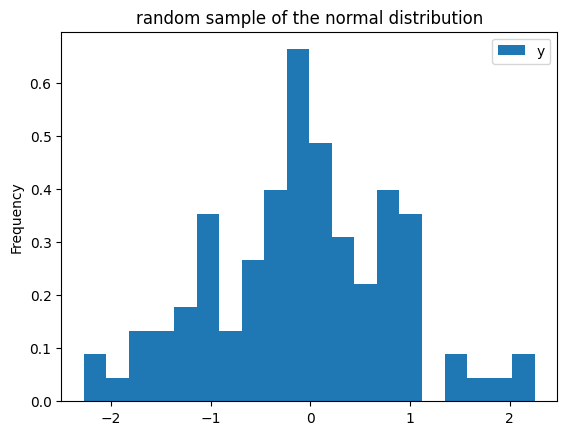

In [68]:
normal_sample.plot.hist(
    title='random sample of the normal distribution',
    bins=20,
    density=False,
    label='y',
    legend=True,
)

In [ ]:
help(plt.hist)

<Axes: title={'center': 'random sample of the normal distribution'}, ylabel='(y - μ) / σ'>

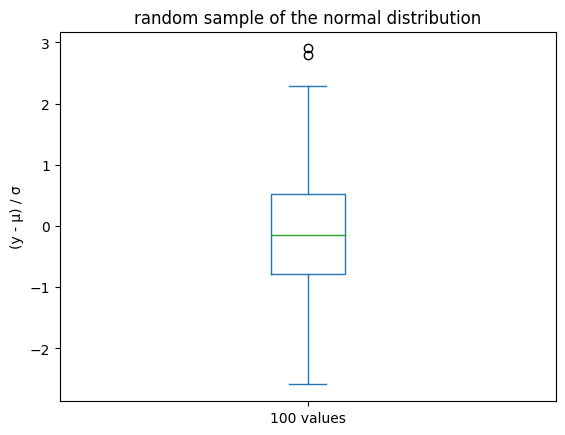

In [38]:
normal_sample.plot.box(
    legend=True,
    title='random sample of the normal distribution',
    ylabel='(y - μ) / σ',
    label=f'{number_of_samples} values',
)

In [ ]:
help(plt.boxplot)

### 4.7 Tasks

##### 1. Standardabweichung
Berechnen Sie die Standardabweichung der `Series((0, 2))` einmal von Hand, einmal mit numpy, und einmal mit Pandas. Was stellen Sie fest? Was müssen Sie tun, um konsistente Ergebnisse zu erhalten?

The standard deviation of a set of values $\{x_i\}_{i = 1,\dots, N}$ is computed as follows:
$$
\sigma = \sqrt{\frac{1}{N - \Delta_\mathrm{ddof}}\sum_{i = 1}^N (x_i - \mu)^2},
$$
where $\mu$ is the mean value:
$$
\mu = \frac{1}{N}\sum_{i=1}^N x_i
$$

In [40]:
serie = pd.Series((0,2))
print(f"{serie.std()=}")
print(f"{serie.std(ddof=0)=}")
print(f"{np.std(serie)=}")

serie.std()=1.4142135623730951
serie.std(ddof=0)=1.0
np.std(serie)=1.0


In [138]:
serie = pd.Series((0,2))

print(f"Mean manuell: {serie.sum() / serie.count()}")
print(f"Standard deviation manuell: {np.sqrt(((serie - serie.mean())**2).sum() / serie.count())}")
print(f"Mean Numpy: {np.mean(serie)}")
print(f"Standard deviation Numpy: {np.std(serie)}")
print(f"Mean Pandas: {serie.mean()}")
print(f"Standard deviation Pandas: {serie.std()}")
print(f"Standard deviation Pandas (uncorrected): {serie.std(ddof=0)}")

Mean manuell: 1.0
Standard deviation manuell: 1.0
Mean Numpy: 1.0
Standard deviation Numpy: 1.0
Mean Pandas: 1.0
Standard deviation Pandas: 1.4142135623730951
Standard deviation Pandas (uncorrected): 1.0


##### 2. Eckpunkte einer Series
Erzeugen Sie sich eine Series mit 400 zufälligen Integern zwischen 0 und 100.
* Verschaffen Sie sich zunächst einen Überblick mit der `.describe`-Methode.
* Welches sind die häufigsten Werte? Welche Werte tauchen am seltensten auf?
* Wie oft tauchen die "vollen 10'er" auf, also 0, 10, 20,...?
* Gibt es Werte zwischen 0 und 100, die gar nicht auftauchen? Wenn ja, welche?

In [178]:
random = pd.Series(np.random.randint(0, 101, 400))
value_counts = random.value_counts(ascending=True)

In [180]:
print(random.describe())

count    400.000000
mean      51.117500
std       28.436161
min        0.000000
25%       26.000000
50%       53.000000
75%       75.250000
max      100.000000
dtype: float64


In [181]:
print('Häufigste Werte:') 
print(value_counts[value_counts == value_counts.max()])
print('Seltenste Werte:')
print(value_counts[value_counts == value_counts.min()])

Häufigste Werte:
58    10
64    10
Name: count, dtype: int64
Seltenste Werte:
2     1
61    1
93    1
91    1
18    1
12    1
25    1
Name: count, dtype: int64


In [182]:
print('Volle 10er:')
print(value_counts[value_counts.index % 10 == 0])
print('10er:')
print(random.value_counts(bins=10, sort=False))

Volle 10er:
60     2
50     3
30     3
70     3
90     3
100    4
80     4
0      5
40     6
10     7
20     8
Name: count, dtype: int64
10er:


In [187]:
print('Werte die nicht vorkommen:')
print(set(range(0, 101)) - set(value_counts.index))

Werte die nicht vorkommen:
{34, 66, 63, 47}


## 5 Data types and Missing Values

### 5.1 Series data types
* internally, Series (and indices) use numpy datatypes
* important implications for "big data":
    * storage requirement differs widely
    * overflow, precision
* at creation, pandas determines a "fitting" dtype
    * only numeric types or "object"
* Series are "flexible"
    * assignment can change the Series data type
    * easy typecasting with `.astype`

In [42]:
integers = pd.Series([20, 30, 40])
integers

0    20
1    30
2    40
dtype: int64

In [43]:
integers.dtype

dtype('int64')

In [44]:
integers = pd.Series([20, 30, 40], dtype=np.int32)
integers

0    20
1    30
2    40
dtype: int32

In [45]:
integers = integers.astype(np.int8)
integers

0    20
1    30
2    40
dtype: int8

In [46]:
integers * 4

0     80
1    120
2    -96
dtype: int8

In [47]:
floats = pd.Series([4, 5, 6], dtype=np.float64)
floats, floats.values

(0    4.0
 1    5.0
 2    6.0
 dtype: float64,
 array([4., 5., 6.]))

In [48]:
objects = pd.Series('using a string yields dtype "object"'.split())
objects

0       using
1           a
2      string
3      yields
4       dtype
5    "object"
dtype: object

In [49]:
integers

0    20
1    30
2    40
dtype: int8

In [50]:
integers.loc[0] = 1.23  # Careful: Assignment with `.loc` changes Series type!
integers

0     1.23
1    30.00
2    40.00
dtype: float64

In [51]:
integers.loc[3] = '56'
integers

0    1.23
1    30.0
2    40.0
3      56
dtype: object

In [52]:
integers.sum()  # Python can not add "str" and "float"

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [188]:
integers = integers.astype(np.float32)
integers

0     1.23
1    30.00
2    40.00
3    56.00
dtype: float32

In [189]:
integers.sum()

127.229996

In [190]:
integers.astype(np.int8)

0     1
1    30
2    40
3    56
dtype: int8

In [234]:
strings = pd.Series('12 34 56 78'.split())
strings.sum()
strings

0    12
1    34
2    56
3    78
dtype: object

In [192]:
strings.mean()

3086419.5

In [193]:
strings = strings.astype(np.int64)  # need to assign back. Not in-place!
strings.mean()

45.0

In [194]:
boolean_mask = integers < 50
boolean_mask

0     True
1     True
2     True
3    False
dtype: bool

In [195]:
pd.Series(
    ['big', 'small', 'big', 'big', 'big', 'small', 'big', 'small', 'small'],
    dtype='category',
)

0      big
1    small
2      big
3      big
4      big
5    small
6      big
7    small
8    small
dtype: category
Categories (2, object): ['big', 'small']

In [196]:
from datetime import datetime, timedelta

dates = pd.Series([datetime.fromisoformat(f'2021-04-{day:02}') for day in range(1, 31)])
times = pd.Series([timedelta(hours=day) for day in range(0, 30)])
dates.head(), times.head()

(0   2021-04-01
 1   2021-04-02
 2   2021-04-03
 3   2021-04-04
 4   2021-04-05
 dtype: datetime64[ns],
 0   0 days 00:00:00
 1   0 days 01:00:00
 2   0 days 02:00:00
 3   0 days 03:00:00
 4   0 days 04:00:00
 dtype: timedelta64[ns])

In [197]:
(dates + times).head()

0   2021-04-01 00:00:00
1   2021-04-02 01:00:00
2   2021-04-03 02:00:00
3   2021-04-04 03:00:00
4   2021-04-05 04:00:00
dtype: datetime64[ns]

### 5.2 Missing Values
* `np.nan` is a special `np.float`
* designates missing or undefined data
    * "no response" in survey data
    * result of certain invalid operations (e.g. `0 / 0`)
* pandas provides functions and parameters for skipping `NaN` values


* Experimental: pandas provides its own "missing value": `pd.NA`
    * can be used as integer

In [198]:
np.nan, pd.NA

(nan, <NA>)

In [236]:
miss = pd.Series([1, 2, np.nan, 4, 5])#  , dtype='Int64')
miss

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64

In [200]:
miss.size, miss.count()

(5, 4)

In [201]:
type(np.nan)

float

In [202]:
np.nan + 10

nan

In [203]:
np.nan == np.nan

False

In [204]:
np.nan is np.nan

True

#### 5.2.1 Dealing with NaN
* numpy typically does *not* deal with nan itself
* pandas often tried to accommodate missing data as best it can
    * treated as 0, and does not add to count
* different methods are applicable in different situations:
    * `dropna` removes missing values
    * `fillna`, `interpolate` fill in missing values
    * `fill_value` prevents creation of missing values

In [205]:
miss.values.sum()  # this sums the numpy array

nan

In [206]:
miss.sum()  # this skips na by default!

12.0

In [ ]:
help(pd.Series.sum)

In [208]:
many_missing_values = pd.Series(
    [-15, np.nan, 4, 9, np.nan, 1, -10, -12, np.nan, np.nan, 3, 13, 25, np.nan]
)
many_missing_values

0    -15.0
1      NaN
2      4.0
3      9.0
4      NaN
5      1.0
6    -10.0
7    -12.0
8      NaN
9      NaN
10     3.0
11    13.0
12    25.0
13     NaN
dtype: float64

In [209]:
many_missing_values.dropna()  # This gets rid of `nan` values

0    -15.0
2      4.0
3      9.0
5      1.0
6    -10.0
7    -12.0
10     3.0
11    13.0
12    25.0
dtype: float64

In [210]:
many_missing_values.fillna(many_missing_values.mean())

0    -15.0
1      2.0
2      4.0
3      9.0
4      2.0
5      1.0
6    -10.0
7    -12.0
8      2.0
9      2.0
10     3.0
11    13.0
12    25.0
13     2.0
dtype: float64

####  5.2.2 fill_value
* numeric operations have optional parameter `fill_value`
* prevents creation of `nan` values when index is not available
* which value is appropriate depends on the operation and context

In [211]:
revenue = pd.Series([1, 2, 3, 4, 5], index=[2017, 2018, 2019, 2020, 2021])
expenses = pd.Series([2, 3, 3, 1], index=[2017, 2018, 2019, 2020])
revenue - expenses  # value for 2021 is missing!

2017   -1.0
2018   -1.0
2019    0.0
2020    3.0
2021    NaN
dtype: float64

In [212]:
revenue.sub(expenses, fill_value=0)

2017   -1.0
2018   -1.0
2019    0.0
2020    3.0
2021    5.0
dtype: float64

#### 5.2.3 interpolate
* pandas can interpolate missing values
* various methods available
    * linear, splines, for smooth plotting, time-sensitive
* warning: this "invents" data

<Axes: >

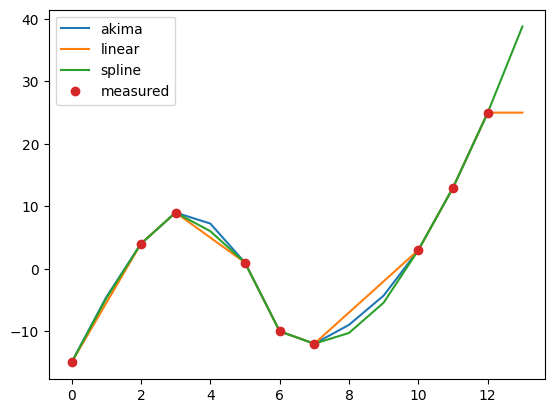

In [213]:
many_missing_values.interpolate(method='akima').plot.line(label='akima', legend=True)
many_missing_values.interpolate(method='linear').plot.line(label='linear', legend=True)
many_missing_values.interpolate(method='spline', order=3).plot.line(
    label='spline', legend=True
)

many_missing_values.plot.line(style='o', legend=True, label='measured')

### 5.3 Tasks

##### 1. Auftreten bei Operationen
Erzeugen Sie drei Series mit normalverteilten Zufallszahlen:
* Eine Series mit 4 Werten und den Indizes 'abcd',
* eine Series mit 5 Werten und den Indizes 'abcde', und
* eine Series mit 6 Werten und den Indizes 'abcabc'.

Multiplizieren und addieren Sie die Series jeweils paarweise.
* Wie können Sie jeweils sinnvollerweise mit `nan`-Werten umgehen oder diese vermeiden?
* Welchen Einfluss haben diese Vorgehensweisen auf Mittelwert und Standardabweichung?

In [251]:
series_4 = pd.Series(index = ['a', 'b', 'c', 'd'], data = np.random.randn(4))
series_5 = pd.Series(index = ['a', 'b', 'c', 'd', 'e'], data = np.random.randn(5))
series_6 = pd.Series(index = ['a', 'b', 'c', 'a', 'b', 'c'], data = np.random.randn(6))

In [253]:
sa_45 = series_4 + series_5
sa_56 = series_5 + series_6
sa_46 = series_4 + series_6

sm_45 = series_4 * series_5
sm_56 = series_5 * series_6
sm_46 = series_4 * series_6

print(f"Addition: \n{sa_45=}, \n{sa_56=}, \n{sa_46=}")
print(f"Multiplikation: \n{sm_45=}, \n{sm_56=}, \n{sm_46=}")

Addition: 
sa_45=a    0.652369
b    0.352015
c    2.160493
d   -1.112411
e         NaN
dtype: float64, 
sa_56=a   -0.011802
a   -1.741122
b   -1.006328
b   -1.706721
c    1.242845
c    0.701628
d         NaN
e         NaN
dtype: float64, 
sa_46=a   -0.360869
a   -2.090189
b    0.114980
b   -0.585413
c    1.123396
c    0.582179
d         NaN
dtype: float64
Multiplikation: 
sm_45=a    0.075934
b   -0.283354
c    1.163365
d    0.300921
e         NaN
dtype: float64, 
sm_56=a   -0.256628
a   -1.122529
b    0.239128
b    0.508531
c    0.117274
c   -0.499698
d         NaN
e         NaN
dtype: float64, 
sm_46=a   -0.077724
a   -0.339976
b   -0.457969
b   -0.973922
c    0.104985
c   -0.447339
d         NaN
dtype: float64


In [263]:
pd.Series.add(series_4, series_5, fill_value=0)


a    0.652369
b    0.352015
c    2.160493
d   -1.112411
e   -0.885362
dtype: float64

In [264]:
pd.Series.mul(series_4, series_5, fill_value=1)

a    0.075934
b   -0.283354
c    1.163365
d    0.300921
e   -0.885362
dtype: float64

In [254]:
print(f"Standardabweichung: \n{sa_45.std()}, \n{sa_56.std()}, \n{sa_46.std()}")
print(f"Standardabweichung: \n{sm_45.std()}, \n{sm_56.std()}, \n{sm_46.std()}")

Standardabweichung: 
1.3418312027234045, 
1.2597238194658056, 
1.114413589745435
Standardabweichung: 
0.6151149563404966, 
0.5888679398301135, 
0.37155020099158337


##### 2. `size` und Imputieren fehlender Werte
Erzeugen Sie eine `Series` mit 1000 zufälligen `float`s zwischen 0 und 1000.
* Ersetzen Sie alle Werte < 100 und alle Werte > 900 mit `np.nan`.
    * Was ist die Summe, die Standardabweichung, und der Mittelwert der Series?
    * Was ist ihre `size`, und wie viele Werte verbleiben?
* Ersetzen Sie alle nun fehlenden Werte mit dem Mittelwert der verbleibenden Werte.
    * Wie ändern sich dadurch Summe, Mittelwert, und Standardabweichung?

In [10]:
S = pd.Series(np.random.random(1000) * 1000)
S.loc[(S < 100) | (S > 900)] = np.nan

print(f"Summe: {S.sum()}")
print(f"Standardabweichung: {S.std()}")
print(f"Mittelwert: {S.mean()}")
print(f"Anzahl: {S.size}, davon nicht nan: {S.count()}")

S = S.fillna(S.mean())

print(f"Summe: {S.sum()}")
print(f"Standardabweichung: {S.std()}")
print(f"Mittelwert: {S.mean()}")
print(f"Anzahl: {S.size}, davon nicht nan: {S.count()}")

Summe: 398089.49941753875
Standardabweichung: 230.2927516171378
Mittelwert: 495.1361933053965
Anzahl: 1000, davon nicht nan: 804
Summe: 495136.1933053965
Standardabweichung: 206.46921065186345
Mittelwert: 495.1361933053965
Anzahl: 1000, davon nicht nan: 1000


## 6 Transformations
* Series values and indices are mutable
    * can easily be re-assigned
    * typical operations still create new instances
    * `inplace=True` is deprecated

* more comprehensive transformations need dedicated methods
    * replace
        * `Series.replace` *ignores* values not found
        * `Series.map` *drops* values not found
        
    * condense
        * `Series.cumsum` adds progressively
        * `Series.aggregate` (or `Series.agg`) returns a scalar value
        
    * sort
        * `Series.sort_values` sorts by series *values*
        * `Series.sort_index` sort by series *index*
    
    * manipulate
        * `Series.apply` uses a single function
        * `Series.transform` uses one or more functions, "string functions", or dicts

### 6.1 Replace and map
* Replace values with different values according to a replacement rule
* for the difference, see also https://stackoverflow.com/a/62947436

#### `Series.replace`
- can utilize strings or regular expressions
- may give two positional arguments: replace first with second
- may also give a mapping (dict or Series)
- all values not explicitly given are ignored

In [ ]:
help(pd.Series.replace)

In [215]:
strings = pd.Series('Er sah das Wasser as'.split())
strings

0        Er
1       sah
2       das
3    Wasser
4        as
dtype: object

In [216]:
strings.replace('as', 'an')

0        Er
1       sah
2       das
3    Wasser
4        an
dtype: object

In [217]:
strings.replace('^.s$', 'an', regex=True)  # with a regular expression

0        Er
1       sah
2       das
3    Wasser
4        an
dtype: object

In [218]:
integers = pd.Series((0, 10, 20, 30))
integers.replace(0, 1000)  # with two values

0    1000
1      10
2      20
3      30
dtype: int64

In [219]:
integers.replace({10: 100, 20: 200, 50: 10})  # with a dict

0      0
1    100
2    200
3     30
dtype: int64

In [220]:
replacement = pd.Series(data=(5, 6, 7), index=(0, 10, 20))
print(integers,replacement)
integers.replace(replacement)  # with a Series

0     0
1    10
2    20
3    30
dtype: int64 0     5
10    6
20    7
dtype: int64


0     5
1     6
2     7
3    30
dtype: int64

#### `Series.map`
- accepts a Series, dict, or function
    - `Series` with old values in the index
    - `dict` with old values: new values as key-value pairs
    - function with a single argument: similar to `apply` (see below)
- if a value is not found, replace with `na`

In [ ]:
help(pd.Series.map)

In [222]:
integers

0     0
1    10
2    20
3    30
dtype: int64

In [223]:
replacement

0     5
10    6
20    7
dtype: int64

In [224]:
integers.map(replacement)

0    5.0
1    6.0
2    7.0
3    NaN
dtype: float64

In [225]:
integers.map({10: 100, 20: 200, 50: 10})

0      NaN
1    100.0
2    200.0
3      NaN
dtype: float64

### 6.2 Condense
- `Series.cumsum` cumulates values
- `Series.mean`, `Series.std` for statistics
- `Series.all`, `Series.any` for truthiness
- `Series.agg` with arbitrary functions

#### `Series.cumsum`
- adds up all values
- sometimes useful in statistics
- returns a Series of the sum up to each index

In [ ]:
help(pd.Series.cumsum)

In [227]:
errors = pd.Series(
    (1, 1, 0, 0, 2, 2, 1), index=pd.date_range(start='2021-04-01', periods=7)
)
errors

2021-04-01    1
2021-04-02    1
2021-04-03    0
2021-04-04    0
2021-04-05    2
2021-04-06    2
2021-04-07    1
Freq: D, dtype: int64

In [228]:
errors.cumsum()

2021-04-01    1
2021-04-02    2
2021-04-03    2
2021-04-04    2
2021-04-05    4
2021-04-06    6
2021-04-07    7
Freq: D, dtype: int64

#### `Series.aggregate`
* applies a function to a Series
    * returns a single value
* applies a *list of* functions
    * returns a *Series of* values

In [229]:
integers.agg('max')

30

In [230]:
integers.agg('std', ddof=1)

12.909944487358056

In [12]:
random_normal = pd.Series(1.87 * np.random.randn(1000))
random_normal.agg(['product', 'sum'])

product   -7.380589e+21
sum       -9.793213e+01
dtype: float64

In [17]:
random_normal.agg(
    [
        pd.Series.count,
        pd.Series.mean,
        pd.Series.std,
        pd.Series.min,
        pd.Series.max,
        pd.Series.quantile,
        pd.Series.quantile,
    ],
)

count       1000.000000
mean          -0.097932
std            1.909121
min           -6.256740
max            5.649563
quantile      -0.107404
quantile      -0.107404
dtype: float64

* note: relatively trivial when applied to Series
* more interesting with DataFrames
    * precise control over axis of aggregation
    * different methods for different columns, at once

In [ ]:
help(pd.Series.agg)

### 6.3 Sort
* a very basic way to manipulate data
* small values first, big values later
    * may pass custom key to sort data by
* may introduce bias and destroy information
    * order of items may convey "hidden" information
    * instead, we suggest a new order which was never there
* sorting the underlying numpy arrays is faster

In [ ]:
help(pd.Series.sort_values)

#### `Series.sort_values`
- returns a new Series, sorted by value
    - sorting order depends on datatype
- may sort in `ascending` order (or not)
- may `ignore_index` to create a new numeric index
- may sort missing values first or last

In [18]:
pd.Series((100, 11, 1)).sort_values()

2      1
1     11
0    100
dtype: int64

In [19]:
pd.Series(('100', '11', '1')).sort_values()

2      1
0    100
1     11
dtype: object

In [20]:
pd.Series(('100', '11', '1')).sort_values(ignore_index=True)

0      1
1    100
2     11
dtype: object

In [21]:
random_normal.sort_values(na_position='first')

746   -6.256740
221   -5.400823
956   -5.318949
911   -5.291591
193   -5.089431
         ...   
232    4.924791
180    4.967086
77     4.971026
257    5.302279
523    5.649563
Length: 1000, dtype: float64

In [22]:
random_normal.sort_values(ascending=False)

523    5.649563
257    5.302279
77     4.971026
180    4.967086
232    4.924791
         ...   
193   -5.089431
911   -5.291591
956   -5.318949
221   -5.400823
746   -6.256740
Length: 1000, dtype: float64

In [46]:
np.random.seed(1)
values_pd = pd.Series(np.random.randn(10_000_000))
values_np = np.random.randn(10_000_000)

In [47]:
%%timeit
values = values_pd.sort_values()

2.09 s ± 37.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%%timeit
values_np.sort()

113 ms ± 5.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### `Series.sort_index`
- we may also sort by index
- when Series have more than one index, sort sequentially
    - may give indices to sort first by
    - may ignore other indices

In [25]:
random_normal.sort_index()

0     -0.929442
1      0.236041
2      0.894137
3     -0.352307
4     -0.489370
         ...   
995    1.486422
996   -2.129280
997   -2.167154
998    0.104962
999    1.027931
Length: 1000, dtype: float64

In [ ]:
help(pd.Series.sort_index)

#### sort functions
- so far only sorted "from small to big" and "from big to small"
- arbitrary functions can be given as "key" to sort by
- series are then sorted by function output

In [27]:
def sort_function(s: int) -> int:
    return np.sin(abs(s))

In [28]:
random_normal.sort_values(key=sort_function)

376    4.697142
422   -4.687259
228   -4.777086
991   -4.593603
730   -4.585645
         ...   
265    1.557893
820    1.561635
707    1.578432
473   -1.574889
881   -1.567959
Length: 1000, dtype: float64

### 6.4 Apply and Transform
- invoke a function on the values
    - operates on *one row at a time*
    - may provide additional keyword args
- for the difference, see https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705

In [ ]:
help(pd.Series.apply)

In [ ]:
help(pd.Series.transform)

#### `Series.transform`
(single Series $\rightarrow$ multiple results)
- may use a (numpy or python) function, a 'string function', a list of functions, or a dict
- cannot use to aggregate Series (result has same length as input)
- may only use a single Series at a time

In [31]:
integers = pd.Series((10, 20, 30))

In [32]:
integers.transform(np.exp)  # numpy ufunc

0    2.202647e+04
1    4.851652e+08
2    1.068647e+13
dtype: float64

In [33]:
def loglin(x, base=np.e):
    return x * np.log(x) / np.log(base)


integers.transform(loglin, base=10)  # Python function

0    10.000000
1    26.020600
2    44.313638
dtype: float64

In [34]:
integers.transform('sqrt')  # "string function": Pandas looks these up

0    3.162278
1    4.472136
2    5.477226
dtype: float64

In [35]:
integers.transform(['sqrt', np.square, loglin])  # output is a `pd.DataFrame`!

,sqrt,square,loglin
0,3.162278,100,23.025851
1,4.472136,400,59.914645
2,5.477226,900,102.035921


#### `Series.apply`
(multiple Series $\rightarrow$ single result)
- may *only* use a numpy ufunc, string function, or a Python function (no list or dict!)
- may use multiple Series (of a DataFrame) at a time
- may produce aggregated results
- may automatically convert the data type

In [36]:
integers.apply(np.sqrt)  # `Series` result

0    3.162278
1    4.472136
2    5.477226
dtype: float64

In [37]:
integers.apply('prod')  # scalar result, does not work with Series.transform

6000

In [38]:
integers.apply(loglin, base=10, convert_dtype=False)

0         10.0
1      26.0206
2    44.313638
dtype: object

In [39]:
transformed_ints = integers.transform(['sqrt', np.square, loglin])
transformed_ints

,sqrt,square,loglin
0,3.162278,100,23.025851
1,4.472136,400,59.914645
2,5.477226,900,102.035921


In [40]:
transformed_ints.apply('sum')  # returns a Series

sqrt        13.111639
square    1400.000000
loglin     184.976418
dtype: float64

In [41]:
transformed_ints.apply('sum', axis=1)

0     126.188129
1     464.386781
2    1007.513147
dtype: float64

In [42]:
transformed_ints

,sqrt,square,loglin
0,3.162278,100,23.025851
1,4.472136,400,59.914645
2,5.477226,900,102.035921


In [43]:
def weigh_by_index(x: pd.DataFrame) -> pd.Series:
    return x.values * x.index


transformed_ints.apply(weigh_by_index, axis=0)

,sqrt,square,loglin
0,0.000000,0,0.000000
1,4.472136,400,59.914645
2,10.954451,1800,204.071843


In [44]:
def my_condensation(x: pd.DataFrame) -> pd.Series:
    return x['sqrt'] + (x['square'] * x['loglin'])


transformed_ints.apply(my_condensation, axis=1)

0     2305.747371
1    23970.330324
2    91837.806530
dtype: float64

In [45]:
transformed_ints.transform(my_condensation, axis=1)

ValueError: Function did not transform

### 6.5 Tasks

Betrachten Sie die `Series` namens `ints` mit einem manuell gesetzten Index und zufällig gewählten Werten.

In [87]:
np.random.seed(1)
ints = pd.Series(np.random.randint(0, 10, 10), index=range(0, 20, 2))
ints

0     5
2     8
4     9
6     5
8     0
10    0
12    1
14    7
16    6
18    9
dtype: int64

##### 1. `replace`, `map`, und `aggregate`
- `replace`, `map`
    - Was erhalten Sie mit `ints.replace(ints)`? Warum erhalten Sie viele ungerade Werte?
    - Was erhalten Sie mit `ints.map(ints)`? Warum hat das Ergebnis fehlende Werte?
- aggregate
    - Schreiben Sie Funktionen `sum_odd` und `sum_even`, welche die ungeraden bzw. geraden Werte einer Series addiert. Nutzen Sie `Series.aggregate`, um sich eine neue Series mit der Summe der ungeraden Werte, der geraden Werte, und aller Werte zu erstellen.

In [73]:
ints.replace(ints)

0     5
2     0
4     9
6     5
8     5
10    5
12    1
14    7
16    5
18    9
dtype: int64

In [74]:
ints.map(ints)

0     NaN
2     0.0
4     NaN
6     NaN
8     5.0
10    5.0
12    NaN
14    NaN
16    5.0
18    NaN
dtype: float64

In [89]:
def sum_odd(x: pd.Series) -> int:
    return x.loc[x % 2 == 1].sum()

def sum_even(x: pd.Series) -> int:
    return x.loc[x % 2 == 0].sum()

In [92]:
ints.agg([sum_odd, sum_even, 'sum'])

sum_odd     36
sum_even    14
sum         50
dtype: int64

##### 2. `sort`, `apply`, und `transform`
- `sort`
    - Sortieren Sie die Werte. Wie unterscheiden sich `kind='heapsort'` und `kind='quicksort'`?
- `apply`, `transform`
  - Wenden Sie (mit `Series.apply`) die Funktionen `np.log`, `np.exp`, `'sqrt'`, und `'square'` auf die Werte an, sodass Sie einen `DataFrame` erhalten.
  - Wenden Sie auf diesen `DataFrame` die Funktion `'sum'` so an, dass Sie eine Series mit dem gleichen Index, aber als Werte die Summe aller Spalten erhalten.
  - wie können Sie mit `Series.transform` das gleiche Endergebnis erhalten?

In [77]:
ints.sort_values(kind='heapsort')

10    0
8     0
12    1
0     5
6     5
16    6
14    7
2     8
4     9
18    9
dtype: int64

In [78]:
ints.sort_values(kind='quicksort')

8     0
10    0
12    1
0     5
6     5
16    6
14    7
2     8
4     9
18    9
dtype: int64

In [79]:
ints.apply([np.log, np.exp, 'sqrt', 'square'])

,log,exp,sqrt,square
0,1.609438,148.413159,2.236068,25
2,2.079442,2980.957987,2.828427,64
4,2.197225,8103.083928,3.000000,81
6,1.609438,148.413159,2.236068,25
8,-inf,1.000000,0.000000,0
10,-inf,1.000000,0.000000,0
12,0.000000,2.718282,1.000000,1
14,1.945910,1096.633158,2.645751,49
16,1.791759,403.428793,2.449490,36
18,2.197225,8103.083928,3.000000,81


In [94]:
ints.apply([np.log, np.exp, 'sqrt', 'square']).apply('sum', axis=1)

0      177.258665
2     3049.865856
4     8189.281152
6      177.258665
8            -inf
10           -inf
12       4.718282
14    1150.224820
16     443.670043
18    8189.281152
dtype: float64

In [96]:
ints.transform([np.log, np.exp, 'sqrt', 'square']).sum(axis=1)

0      177.258665
2     3049.865856
4     8189.281152
6      177.258665
8            -inf
10           -inf
12       4.718282
14    1150.224820
16     443.670043
18    8189.281152
dtype: float64

## 7 Conclusion: Pandas Series
- `Series` are a powerful class for one-dimensional data
    - numpy arrays with generalized indexing capabilities
    - a plenitude of methods are available
        * easily construct, plot, and transform data
        * do simple statistics and deal with missing values
        * much more than shown here — read the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)


- `Series` cannot deal well with multi-dimensional data
    - scatterplots are a pain
    - we need to (ab-)use the index
    - we cannot hold all our data (e.g. measurements) in one object


- up one level: `DataFrame`s!